In [2]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import pandas
import re
import datetime
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline

In [4]:
subway = pd.read_csv("data/서울 지하철역 좌표.csv")
subway_list = list((set(subway['역명'])))
subway_list.sort()

In [5]:
sub_list = []
for i in range(len(subway_list)):
    sub_list.append(re.findall('[가-힣]+', subway_list[i])[0])
sub_list

['가락시장',
 '가산디지털단지',
 '강남',
 '강남구청',
 '강동',
 '강동구청',
 '강변',
 '개롱',
 '개화산',
 '거여',
 '건대입구',
 '경복궁',
 '경찰병원',
 '고덕',
 '고려대',
 '고속터미널',
 '공덕',
 '공릉',
 '광나루',
 '광명사거리',
 '광화문',
 '광흥창',
 '교대',
 '구로디지털단지',
 '구산',
 '구의',
 '구파발',
 '군자',
 '굴포천',
 '굽은다리',
 '금호',
 '길동',
 '길음',
 '김포공항',
 '까치산',
 '까치울',
 '낙성대',
 '남구로',
 '남부터미널',
 '남성',
 '남태령',
 '남한산성입구',
 '내방',
 '노원',
 '녹번',
 '녹사평',
 '논현',
 '단대오거리',
 '답십리',
 '당고개',
 '당산',
 '대림',
 '대청',
 '대치',
 '대흥',
 '도곡',
 '도림천',
 '도봉산',
 '독립문',
 '독바위',
 '돌곶이',
 '동대문',
 '동대문역사문화공원',
 '동대입구',
 '동묘앞',
 '동작',
 '둔촌동',
 '디지털미디어시티',
 '뚝섬',
 '뚝섬유원지',
 '마곡',
 '마들',
 '마장',
 '마천',
 '마포',
 '마포구청',
 '망원',
 '매봉',
 '먹골',
 '면목',
 '명동',
 '명일',
 '모란',
 '목동',
 '몽촌토성',
 '무악재',
 '문래',
 '문정',
 '미아',
 '미아사거리',
 '반포',
 '발산',
 '방배',
 '방이',
 '방화',
 '버티고개',
 '보라매',
 '보문',
 '복정',
 '봉천',
 '봉화산',
 '부천시청',
 '부천종합운동장',
 '부평구청',
 '불광',
 '사가정',
 '사당',
 '산성',
 '삼각지',
 '삼산체육관',
 '삼성',
 '상계',
 '상도',
 '상동',
 '상봉',
 '상수',
 '상왕십리',
 '상월곡',
 '상일동',
 '새절',
 '서대문',
 '서울',
 '서울대입구',
 '서울역',
 '서초',
 '석계',
 

In [6]:
# Naver API
import urllib.request
import os
import sys
import urllib.request
import json

def get_trend(body):
    url = "https://openapi.naver.com/v1/datalab/search"
    client_id = "key발급"
    client_secret = "key발급"
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))

    return json.loads(response.read().decode('utf-8'))

# 기준값 '한양대 맛집', '한양대 카페'
# sub_list 순서대로 넣어서 뽑아주기
naver_trend = []
body = {
        "startDate":"2019-11-20",
        "endDate":"2020-08-31",
        "timeUnit":"date",
        "keywordGroups":[
            {"groupName":"한양대역", "keywords":["한양대 맛집", "한양대 카페"]},
            {"groupName":"{}역".format(sub_list[100]), "keywords":["{} 맛집".format(sub_list[100]), "{} 카페".format(sub_list[100])]},
            {"groupName":"{}역".format(sub_list[101]), "keywords":["{} 맛집".format(sub_list[101]), "{} 카페".format(sub_list[101])]},
            {"groupName":"{}역".format(sub_list[102]), "keywords":["{} 맛집".format(sub_list[102]), "{} 카페".format(sub_list[102])]},
            {"groupName":"{}역".format(sub_list[103]), "keywords":["{} 맛집".format(sub_list[103]), "{} 카페".format(sub_list[103])]}
        ]
}


body = json.dumps(body, indent=4, ensure_ascii=False)
naver_trend.append(get_trend(body))

## 한양대를 기준으로 한 Raw Data Frame 저장하고 불러오기

In [9]:
# df.to_pickle('다듬지않은 검색어트렌드(원본보기용)(200124-200131)_3.pkl')
df = pd.read_pickle('data/다듬지않은 검색어트렌드(원본보기용)(200124-200131)_3.pkl')

In [10]:
set(df['title'])

{'가락시장역',
 '가산디지털단지역',
 '강남구청역',
 '강남역',
 '강동구청역',
 '강동역',
 '강변역',
 '개롱역',
 '개화산역',
 '거여역',
 '건대입구역',
 '경복궁역',
 '경찰병원역',
 '고덕역',
 '고려대역',
 '고속터미널역',
 '공덕역',
 '공릉역',
 '광나루역',
 '광명사거리역',
 '광화문역',
 '광흥창역',
 '교대역',
 '구로디지털단지역',
 '구산역',
 '구의역',
 '구파발역',
 '군자역',
 '굴포천역',
 '굽은다리역',
 '금호역',
 '길동역',
 '길음역',
 '김포공항역',
 '까치산역',
 '까치울역',
 '낙성대역',
 '남구로역',
 '남부터미널역',
 '남성역',
 '남태령역',
 '남한산성입구역',
 '내방역',
 '노원역',
 '녹번역',
 '녹사평역',
 '논현역',
 '단대오거리역',
 '답십리역',
 '당고개역',
 '당산역',
 '대림역',
 '대청역',
 '대치역',
 '대흥역',
 '도곡역',
 '도림천역',
 '도봉산역',
 '독립문역',
 '독바위역',
 '돌곶이역',
 '동대문역',
 '동대문역사문화공원역',
 '동대입구역',
 '동묘앞역',
 '동작역',
 '둔촌동역',
 '디지털미디어시티역',
 '뚝섬역',
 '뚝섬유원지역',
 '마곡역',
 '마들역',
 '마장역',
 '마천역',
 '마포구청역',
 '마포역',
 '망원역',
 '매봉역',
 '먹골역',
 '면목역',
 '명동역',
 '명일역',
 '모란역',
 '목동역',
 '몽촌토성역',
 '무악재역',
 '문래역',
 '문정역',
 '미아사거리역',
 '미아역',
 '반포역',
 '발산역',
 '방배역',
 '방이역',
 '방화역',
 '버티고개역',
 '보라매역',
 '보문역',
 '복정역',
 '봉천역',
 '봉화산역',
 '부천시청역',
 '부천종합운동장역',
 '부평구청역',
 '불광역',
 '사가정역',
 '사당역',
 '산성역',
 '삼각지역',
 '삼산체육관역',
 '삼성역',
 '상계

In [11]:
# 값이 아예 0인 지하철역 뽑기 
# 기준값 추가 후 값 = 0 애들 사라짐
empty_list = []
for i in range(len(df)):
    if len(df['data'][i]) == 0:
        empty_list.append(df['title'][i].replace('역', ''))
        df.drop([i], axis=0, inplace=True)

a_sub_b = [x for x in sub_list if x not in empty_list]
# a_sub_b.remove('서울역')
len(a_sub_b)

243

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
new_li = (df['title'].tolist())
len(new_li)

243

In [14]:
dt_index = pandas.date_range(start='2019-11-20', end='2020-09-08')
dt_list = dt_index.strftime("%Y-%m-%d").tolist()
len(dt_list)

294

In [15]:
df_ = pd.DataFrame(columns=new_li, index=range(0,len(dt_list)))
for j in tqdm(range(len(new_li)-1)):
    if len(df['data'][j])-1 == len(dt_list):    
        for i in range(len(dt_list)): 
            df_.iloc[i][j] = df['data'][j][i]['ratio']
    else:
        for m in range(len(df['data'][j])-1):
            try:
                df_.iloc[m][j] = df['data'][j][m]['ratio']
            except IndexError:
                df_.iloc[m][j] = None
                continue

100%|████████████████████████████████████████████████████████████████████████████████| 242/242 [00:10<00:00, 22.62it/s]


In [16]:
df_ = df_[:285]

In [17]:
df_

,한양대역,가락시장역,가산디지털단지역,강남역,강남구청역,강동역,강동구청역,강변역,개롱역,개화산역,...,한강진역,한성대입구역,합정역,행당역,혜화역,홍대입구역,홍제역,화곡역,화랑대역,회현역
0,4.8698,5.16795,9.5309,55.4661,6.66865,11.0597,9.0236,11.9852,0.74039,0.50902,...,5.78468,1.60685,55.74,0.30464,31.4674,2.85605,1.15511,9.16242,1.98981,NaN
1,6.45994,5.19777,9.56072,60.4552,6.63883,11.2911,9.20869,12.8644,0.55529,0.37019,...,6.67737,1.48187,59.5965,0.26656,34.5392,3.22416,1.47245,10.273,1.24942,NaN
2,8.90479,5.87358,10.3856,74.5677,7.2252,12.124,9.53262,16.659,0.74039,1.15687,...,8.96268,1.83895,78.3431,0.22848,42.3712,4.29042,1.45976,12.0777,1.52707,NaN
3,18.1972,6.21148,10.962,82.1507,7.24508,15.8723,10.3656,23.1837,0.74039,1.52707,...,11.8372,2.30316,90.3053,0.55851,62.0589,6.3087,1.95481,14.9468,2.03609,NaN
4,21.4768,5.13814,7.52335,70.7712,5.22758,15.3633,9.53262,23.8778,1.01804,0.32392,...,9.76611,1.53544,63.5958,0.34272,41.6984,4.3412,1.25666,15.5946,2.49884,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2.87219,2.65354,4.64122,21.4371,3.71695,9.11614,5.96945,5.36788,1.06432,NaN,...,2.55311,0.51776,28.1557,0.25387,10.4976,1.1805,1.07895,5.92318,0.32392,NaN
281,2.73305,2.87219,4.63128,21.9837,4.00516,9.44007,6.20083,4.81258,0.32392,NaN,...,2.46384,0.73201,29.9054,0.1904,11.5511,0.9774,1.07895,5.59925,1.38824,NaN
282,2.36533,2.7728,4.63128,22.749,3.81633,9.48634,5.64553,6.062,0.60157,NaN,...,2.67809,0.73201,35.1901,0.29195,13.506,1.07895,1.24397,6.52475,0.92549,NaN
283,1.99761,2.31564,3.23991,22.6893,2.97157,10.1805,5.13651,5.96945,0.55529,NaN,...,2.16032,0.58918,32.1728,0.30464,11.8685,0.87585,1.06626,6.9875,1.15687,NaN


In [18]:
df_.drop(['회현역'], axis=1, inplace=True)

In [19]:
# for i in range(1, len(new_li), 4):
#     print(i)
df_0 = df_.fillna(0)

In [20]:
# 5개씩 묶어서 60번 61번째 루프에서 기준값과 마지막 검색어 
len(new_li)/4

60.75

In [ ]:
df_0

# 주별로 묶기

In [31]:
df_0.iloc[0:0+8, 1:].mean()

가락시장역        5.263610
가산디지털단지역     9.460091
강남역         67.338745
강남구청역        6.595354
강동역         12.956960
              ...    
혜화역         39.530969
홍대입구역        3.816000
홍제역          1.386769
화곡역         12.129798
화랑대역         1.995600
Length: 241, dtype: float64

In [32]:
df_0_ = df_0.copy()

In [33]:
df_0.iloc[:, 1:]

,가락시장역,가산디지털단지역,강남역,강남구청역,강동역,강동구청역,강변역,개롱역,개화산역,거여역,...,학여울역,한강진역,한성대입구역,합정역,행당역,혜화역,홍대입구역,홍제역,화곡역,화랑대역
0,5.16795,9.53090,55.46611,6.66865,11.05969,9.02360,11.98519,0.74039,0.50902,1.01804,...,0.27764,5.78468,1.60685,55.74004,0.30464,31.46737,2.85605,1.15511,9.16242,1.98981
1,5.19777,9.56072,60.45517,6.63883,11.29106,9.20869,12.86441,0.55529,0.37019,1.52707,...,1.61962,6.67737,1.48187,59.59650,0.26656,34.53922,3.22416,1.47245,10.27302,1.24942
2,5.87358,10.38560,74.56768,7.22520,12.12401,9.53262,16.65895,0.74039,1.15687,1.34197,...,1.29569,8.96268,1.83895,78.34315,0.22848,42.37116,4.29042,1.45976,12.07774,1.52707
3,6.21148,10.96203,82.15066,7.24508,15.87228,10.36557,23.18371,0.74039,1.52707,1.43452,...,1.20314,11.83717,2.30316,90.30530,0.55851,62.05889,6.30870,1.95481,14.94678,2.03609
4,5.13814,7.52335,70.77121,5.22758,15.36325,9.53262,23.87783,1.01804,0.32392,1.61962,...,0.27764,9.76611,1.53544,63.59578,0.34272,41.69840,4.34120,1.25666,15.59463,2.49884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2.65354,4.64122,21.43709,3.71695,9.11614,5.96945,5.36788,1.06432,0.00000,0.87922,...,0.00000,2.55311,0.51776,28.15568,0.25387,10.49758,1.18050,1.07895,5.92318,0.32392
281,2.87219,4.63128,21.98370,4.00516,9.44007,6.20083,4.81258,0.32392,0.00000,0.97177,...,0.00000,2.46384,0.73201,29.90537,0.19040,11.55115,0.97740,1.07895,5.59925,1.38824
282,2.77280,4.63128,22.74895,3.81633,9.48634,5.64553,6.06200,0.60157,0.00000,1.57334,...,0.00000,2.67809,0.73201,35.19014,0.29195,13.50596,1.07895,1.24397,6.52475,0.92549
283,2.31564,3.23991,22.68932,2.97157,10.18047,5.13651,5.96945,0.55529,0.00000,1.48079,...,0.00000,2.16032,0.58918,32.17282,0.30464,11.86849,0.87585,1.06626,6.98750,1.15687


In [34]:
df_0.iloc[1:1+8].mean()

한양대역         9.243933
가락시장역        5.249945
가산디지털단지역     9.472515
강남역         68.701545
강남구청역        6.451248
              ...    
혜화역         40.298930
홍대입구역        3.850908
홍제역          1.405809
화곡역         12.320681
화랑대역         2.105504
Length: 242, dtype: float64

In [35]:
df_0.iloc[1, 1:]

가락시장역        5.19777
가산디지털단지역     9.56072
강남역         60.45517
강남구청역        6.63883
강동역         11.29106
              ...   
혜화역         34.53922
홍대입구역        3.22416
홍제역          1.47245
화곡역         10.27302
화랑대역         1.24942
Name: 1, Length: 241, dtype: float64

In [36]:
# df_new = pd.DataFrame(data=[], columns=df_0.columns)
for i in range(len(df_0)):
    df_0_.iloc[i, 1:] = df_0.iloc[i:i+8].mean()

ValueError: cannot reindex from a duplicate axis

In [37]:
df_0_ = df_0_[72:]
df_0_.reset_index(drop=True, inplace=True)

In [38]:
df_0_['date'] = pd.to_datetime(df_0_['date'])

KeyError: 'date'

In [40]:
# 날짜 생성
dt_index = pandas.date_range(start='2019-11-21', end='2020-08-31')
dt_list = dt_index.strftime("%Y-%m-%d").tolist()
df_0.insert(0,"date",dt_list,True)
df_0['date'] = dt_list
df_0.reset_index(drop=True, inplace=True)

In [41]:
# df_0.drop(['date'], axis=1, inplace=True)

In [42]:
df_0

,date,date,한양대역,가락시장역,가산디지털단지역,강남역,강남구청역,강동역,강동구청역,강변역,...,학여울역,한강진역,한성대입구역,합정역,행당역,혜화역,홍대입구역,홍제역,화곡역,화랑대역
0,2019-11-21,2019-11-21,4.86980,5.16795,9.53090,55.46611,6.66865,11.05969,9.02360,11.98519,...,0.27764,5.78468,1.60685,55.74004,0.30464,31.46737,2.85605,1.15511,9.16242,1.98981
1,2019-11-22,2019-11-22,6.45994,5.19777,9.56072,60.45517,6.63883,11.29106,9.20869,12.86441,...,1.61962,6.67737,1.48187,59.59650,0.26656,34.53922,3.22416,1.47245,10.27302,1.24942
2,2019-11-23,2019-11-23,8.90479,5.87358,10.38560,74.56768,7.22520,12.12401,9.53262,16.65895,...,1.29569,8.96268,1.83895,78.34315,0.22848,42.37116,4.29042,1.45976,12.07774,1.52707
3,2019-11-24,2019-11-24,18.19717,6.21148,10.96203,82.15066,7.24508,15.87228,10.36557,23.18371,...,1.20314,11.83717,2.30316,90.30530,0.55851,62.05889,6.30870,1.95481,14.94678,2.03609
4,2019-11-25,2019-11-25,21.47684,5.13814,7.52335,70.77121,5.22758,15.36325,9.53262,23.87783,...,0.27764,9.76611,1.53544,63.59578,0.34272,41.69840,4.34120,1.25666,15.59463,2.49884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2020-08-27,2020-08-27,2.87219,2.65354,4.64122,21.43709,3.71695,9.11614,5.96945,5.36788,...,0.00000,2.55311,0.51776,28.15568,0.25387,10.49758,1.18050,1.07895,5.92318,0.32392
281,2020-08-28,2020-08-28,2.73305,2.87219,4.63128,21.98370,4.00516,9.44007,6.20083,4.81258,...,0.00000,2.46384,0.73201,29.90537,0.19040,11.55115,0.97740,1.07895,5.59925,1.38824
282,2020-08-29,2020-08-29,2.36533,2.77280,4.63128,22.74895,3.81633,9.48634,5.64553,6.06200,...,0.00000,2.67809,0.73201,35.19014,0.29195,13.50596,1.07895,1.24397,6.52475,0.92549
283,2020-08-30,2020-08-30,1.99761,2.31564,3.23991,22.68932,2.97157,10.18047,5.13651,5.96945,...,0.00000,2.16032,0.58918,32.17282,0.30464,11.86849,0.87585,1.06626,6.98750,1.15687


# 최종 Data Frame 저장하고 불러오기

## 실행할 때 여기부터 실행하기 

In [3]:
# df_0_.to_pickle("검색어트렌드_한양대_final.pkl")
df = pd.read_pickle('data/검색어트렌드_한양대_final.pkl')

In [48]:
df['한양대역'].mean()

17.500699472501694

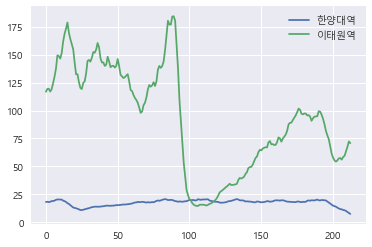

In [45]:
df['한양대역'].plot()
df['이태원역'].plot()
plt.legend()
plt.show()

In [213]:
# 각 열마다 중 최대값 == 92.26857750000002
df.max(axis=1).max()
# df.min(axis=1).min()

10.142919999999998

In [220]:
# 그 최대값은 74+1 번째 열 == '마포'
df.loc[:, '가락시장':'효창공원앞'].max().tolist().index(92.26857750000002)
# min == 196번째 열 == '이태원'
# df.loc[:, '가락시장':'효창공원앞'].min().tolist().index(10.142919999999998)

74

In [222]:
# 18번째 행 == '2020-02-19'
df.iloc[:, 75].tolist().index(92.26857750000002)
# min 111 번째 행 == '2020-05-22'
# df.iloc[:, 196].tolist().index(10.142919999999998)

18

In [46]:
# min : 이태원 / mid : 한양대 / max : 마포
df[['이태원역', '한양대역', '마포역']]

,이태원역,한양대역,마포역
0,116.793834,18.203371,228.106965
1,119.336483,18.353765,224.162495
2,119.476848,18.064547,222.632160
3,117.001297,18.371119,222.724245
4,119.154958,18.984261,222.603502
...,...,...,...
208,59.453025,10.782038,204.398679
209,63.350763,10.134190,217.008932
210,67.373299,9.270390,228.265748
211,72.337715,8.398880,233.157424


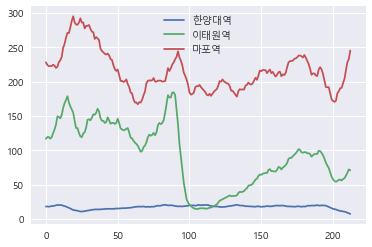

In [49]:
# plt.xticks(df.iloc[:, 0])
df['한양대역'].plot()
df['이태원역'].plot()
df['마포역'].plot()
plt.legend()
plt.show()

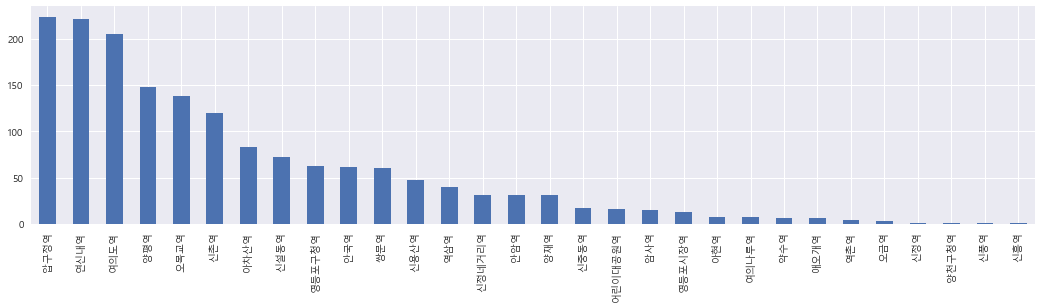

In [47]:
df.iloc[:, 150:180].mean().sort_values(ascending=False).plot(kind='bar', figsize=(18,4))